# Ex_1

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

LOAD_GRAY_SCALE = 1
LOAD_RGB = 2

# imReadAndConvert 

In [10]:
def imReadAndConvert(filename:str, representation:int)->np.ndarray:
    if representation == LOAD_GRAY_SCALE:
        img = cv2.imread(filename,0)
        norm_img = normalize(img)
    elif representation == LOAD_RGB:
        img = cv2.imread(filename)
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        norm_img = normalize(img_rgb)
    return norm_img

def normalize(img):
    norm_img = norm_image = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return norm_img

def unnormalize(img):
    norm_img = norm_image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return norm_img.astype('uint32')

# imDisplay - Disply the image using matplotlib

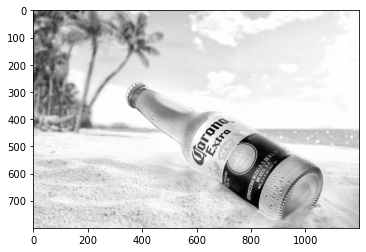

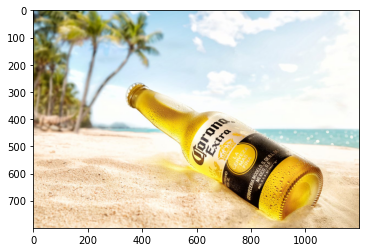

In [11]:
def imDisplay(filename: str, representation: int):
    """
    Reads an image as RGB or GRAY_SCALE and displays it
    :param filename: The path to the image
    :param representation: GRAY_SCALE or RGB
    :return: None
    """
    img = imReadAndConvert(filename,representation)
    plt.imshow(img,cmap='gray')
    plt.show()

img_path = 'beach.jpg'
imDisplay(img_path, LOAD_GRAY_SCALE)
imDisplay(img_path, LOAD_RGB)

# transform from RGB to YIQ and the vice versa


In [15]:
#tranfrom the image from RGB to YIQ using multiply matrix.
def transformRGB2YIQ(imgRGB: np.ndarray) -> np.ndarray:
    """
    Converts an RGB image to YIQ color space
    :param imgRGB: An Image in RGB
    :return: A YIQ in image color space
    """
    yiq_mat = np.array([[0.299, 0.587, 0.144], [0.596, -0.275, -0.321], [0.212, -0.523, 0.311]])
    imgYIQ = np.dot(imgRGB, yiq_mat.T.copy())
    return imgYIQ

#tranfrom the image from YIQ to RGB using multiply matrix.
def transformYIQ2RGB(imgYIQ: np.ndarray) -> np.ndarray:
    """
    Converts an YIQ image to RGB color space
    :param imgYIQ: An Image in YIQ
    :return: A RGB in image color space
    """
    rgb_mat = np.array([[1, 0.956, 0.619], [1, -0.272, -0.647], [1, -1.106, 1.703]])
    imgRGB = np.dot(imgYIQ, rgb_mat.T.copy())
    return imgRGB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


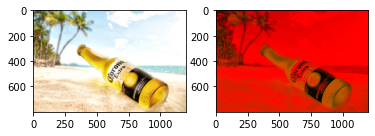

In [100]:
img = imReadAndConvert(img_path, LOAD_RGB)
yiq_img = transformRGB2YIQ(img)
rgb_img = transformYIQ2RGB(yiq_img)

f, ax = plt.subplots(1, 2)
ax[0].imshow(rgb_img)
ax[1].imshow(yiq_img)
plt.show()

# histogram for image, work with grayscle and RGB


In [122]:
""" 
 histogram for image grayscle and RGB. 
 histogram for GRAYSCALE
 imgEq - > the final image after eq.
 histOrg - > the histogram of the original image.
 histEq - > the histogram after eq.
 """
def hsitogramEqualize(imgOrig: np.ndarray) -> (np.ndarray, np.ndarray, np.ndarray):
    if len(imgOrig.shape) == 2:
        un_norm_img = unnormalize(imgOrig)
        histOrg,bins = np.histogram(un_norm_img.flatten(),256,[0,256])
        cdf = histOrg.cumsum()
        cdf_normalized = cdf * histOrg.max()/ cdf.max()
        cdf_m = np.ma.masked_equal(cdf,0)
        cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
        cdf = np.ma.filled(cdf_m,0).astype('uint8')
        imgEq = cdf[un_norm_img]
        histEq,bins2 = np.histogram(imgEq.flatten(),256,[0,256])
        return (imgEq, histOrg, histEq)
    else:
        imgYIQ = transformRGB2YIQ(imgOrig)
        un_norm_img = np.float32(unnormalize(imgYIQ[:,:,0]))
        clipped_YIQ = np.zeros(un_norm_img.shape)
        y_min = np.amin(un_norm_img)
        y_max = np.amax(un_norm_img)
        cv2.normalize(un_norm_img, un_norm_img, 0, 255, cv2.NORM_MINMAX)

        histOrg,bins = np.histogram(un_norm_img.flatten(),256,[0,256])
        cdf = histOrg.cumsum()
        cdf_normalized = cdf * histOrg.max()/ cdf.max()

        cdf_m = np.ma.masked_equal(cdf,0)
        cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
        cdf = np.ma.filled(cdf_m,0).astype('uint8')
        res = cdf[un_norm_img.astype('uint8')]
        histEq,bins2 = np.histogram(res.flatten(),256,[0,256])

        cv2.normalize(res, res, y_min, y_max, cv2.NORM_MINMAX)
        res = normalize(res)
        imgYIQ[:,:,0] = res
        imgEq = transformYIQ2RGB(imgYIQ)
        return (imgEq, histOrg, histEq)

# helping function to plot the histogram with the cdf

In [123]:
# helping function the plot image.
def plt_hist(hist, img):
    un_norm_img = unnormalize(img)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(un_norm_img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()

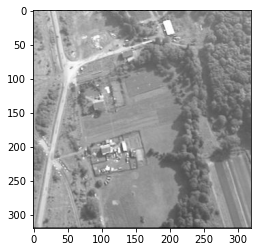

In [130]:
img = imReadAndConvert('image_hist.jpg', LOAD_RGB)
plt.imshow(img)

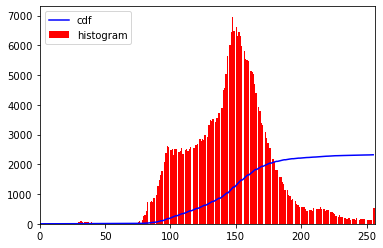

In [131]:
img = imReadAndConvert('image_hist.jpg', LOAD_RGB)
imgeq, histOrg, histEq = hsitogramEqualize(img)
plt_hist(histOrg,img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


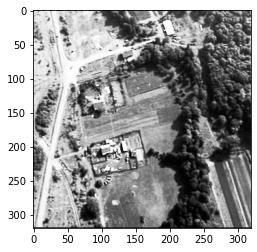

In [138]:
img = imReadAndConvert('image_hist.jpg', LOAD_RGB)
imgeq, histOrg, histEq = hsitogramEqualize(img)
plt.imshow(imgeq)

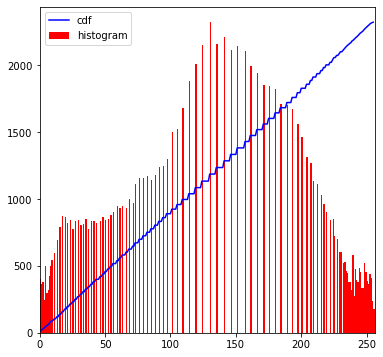

In [137]:
img = imReadAndConvert('image_hist.jpg', LOAD_GRAY_SCALE)
imgeq, histOrg, histEq = hsitogramEqualize(img)
plt.figure(figsize = (6,6))
plt_hist(histEq,imgeq)

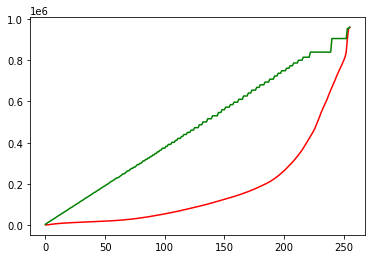

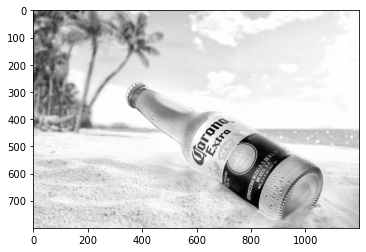

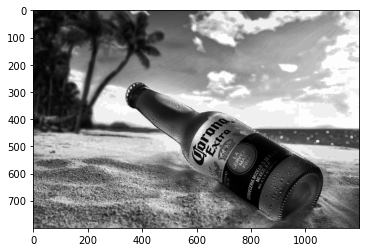

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


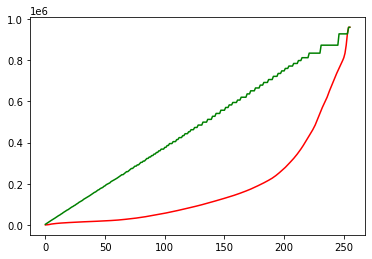

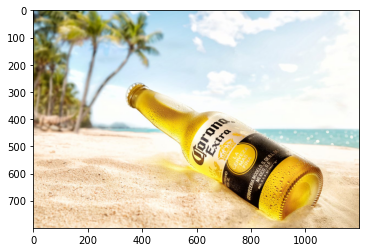

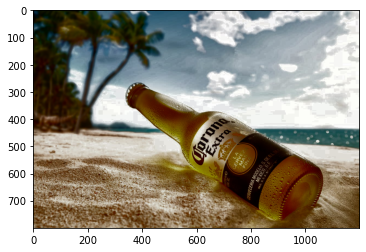

In [128]:
def histEqDemo(img_path: str, rep: int):
    img = imReadAndConvert(img_path, rep)
    imgeq, histOrg, histEq = hsitogramEqualize(img)
    
    # Display cumsum
    cumsum = np.cumsum(histOrg)
    cumsumEq = np.cumsum(histEq)
    plt.gray()
    plt.plot(range(256), cumsum, 'r')
    plt.plot(range(256), cumsumEq, 'g')

    # Display the images
    plt.figure()
    plt.imshow(img)

    plt.figure()
    plt.imshow(imgeq)
    plt.show()

histEqDemo(img_path, LOAD_GRAY_SCALE)
histEqDemo(img_path, LOAD_RGB)

In [142]:
def nothing(x):
    pass

def gammaDisplay(img_path: str, rep: int):
    """
    GUI for gamma correction
    :param img_path: Path to the image
    :param rep: grayscale(1) or RGB(2)
    :return: None
    """
    img = cv2.imread(img_path, rep)
    gamma = 0.01
    bar_text = "Gamma"
    # Prepare track bar for setting gamma value (prepare with 100 times value because decimal point can not be handled)
    cv2.namedWindow("gammma correction", cv2.WINDOW_NORMAL)
    cv2.createTrackbar(bar_text, "gammma correction", 0, 200, nothing)
    cv2.setTrackbarPos(bar_text, "gammma correction", 100)

    while(1):
        plt.imshow(img)
        # Gamma value acquisition (0 is forcibly pulled back to 0.01)
        gamma = cv2.getTrackbarPos(bar_text, "gammma correction") * 0.01
        if gamma == 0:
            gamma = 0.01
            cv2.setTrackbarPos(bar_text, "gammma correction", 0)

        # Gamma correction lookup table
        look_up_table = np.zeros((256, 1), dtype = 'uint8')
        for i in range(len(look_up_table)):
            look_up_table[i][0] = (len(look_up_table)-1) * pow(float(i) / (len(look_up_table)-1), 1.0 / gamma)

        gamma_correction_image = cv2.LUT(img, look_up_table)

        # Window display
        cv2.putText(gamma_correction_image, "Gamma:" + str(gamma), (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0),2)
        cv2.imshow("gammma correction", gamma_correction_image)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
    cv2.destroyAllWindows()
